In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import missingno as msno
from collections import Counter
%matplotlib inline

# Data

use a time series of covid-19 cases in the US by state, from January 1st - July 27th.

In [2]:
states_time_series = pd.read_csv("data/us-states.csv")
states_time_series.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [3]:
states_time_series.tail()

,date,state,fips,cases,deaths
8094,2020-07-27,Virginia,51,86072,2082
8095,2020-07-27,Washington,53,55548,1611
8096,2020-07-27,West Virginia,54,6054,106
8097,2020-07-27,Wisconsin,55,53323,905
8098,2020-07-27,Wyoming,56,2520,25


Let's check the the amount of missing data to see if we need to drop any columns.
No missing data

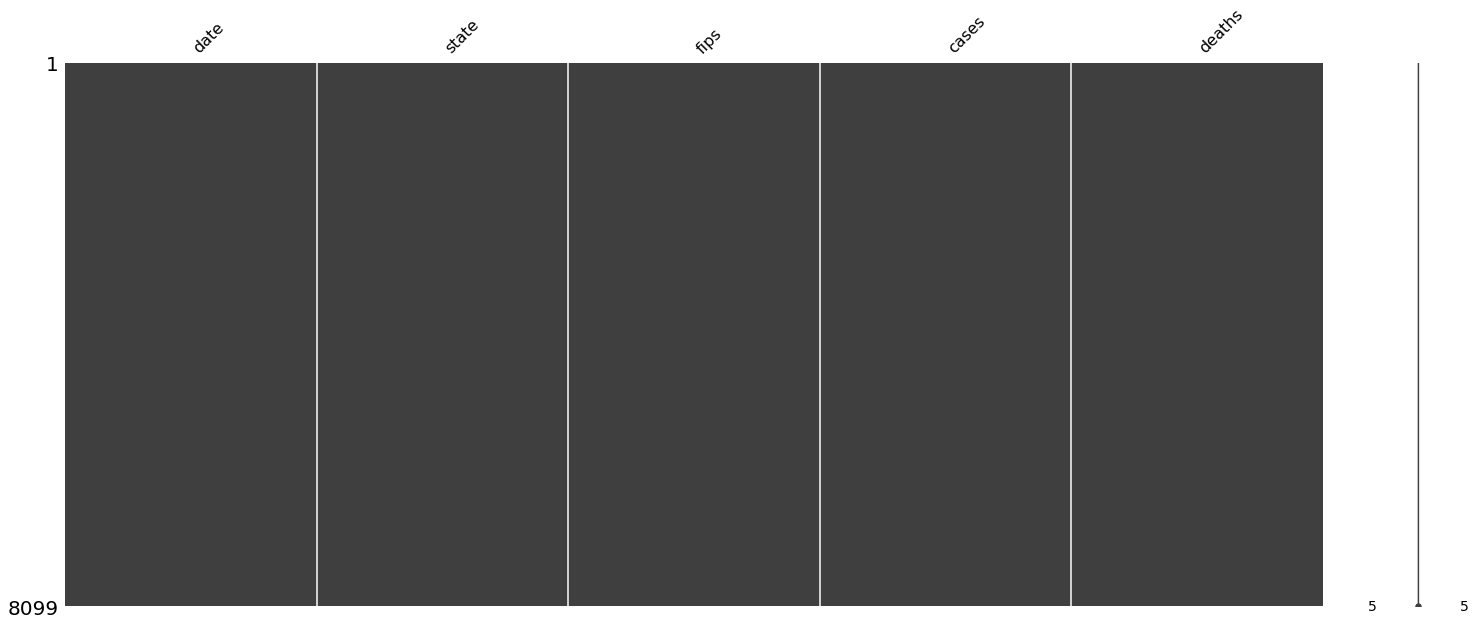

In [4]:
msno.matrix(states_time_series)
# msno.bar(states_time_series)

In [5]:
states_time_series.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [6]:
states_time_series["state"].values

array(['Washington', 'Washington', 'Washington', ..., 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [7]:
state_count = Counter(states_time_series["state"].values)
state_count

Counter({'Washington': 189,
         'Illinois': 186,
         'California': 185,
         'Arizona': 184,
         'Massachusetts': 178,
         'Wisconsin': 174,
         'Texas': 167,
         'Nebraska': 162,
         'Utah': 154,
         'Oregon': 151,
         'Florida': 149,
         'New York': 149,
         'Rhode Island': 149,
         'Georgia': 148,
         'New Hampshire': 148,
         'North Carolina': 147,
         'New Jersey': 146,
         'Colorado': 145,
         'Maryland': 145,
         'Nevada': 145,
         'Tennessee': 145,
         'Hawaii': 144,
         'Indiana': 144,
         'Kentucky': 144,
         'Minnesota': 144,
         'Oklahoma': 144,
         'Pennsylvania': 144,
         'South Carolina': 144,
         'District of Columbia': 143,
         'Kansas': 143,
         'Missouri': 143,
         'Vermont': 143,
         'Virginia': 143,
         'Connecticut': 142,
         'Iowa': 142,
         'Louisiana': 141,
         'Ohio': 141,
         'M

In [8]:
len(state_count)

55

In [9]:
states_time_series['date'] = pd.to_datetime(states_time_series['date'])
states_time_series['date']

0      2020-01-21
1      2020-01-22
2      2020-01-23
3      2020-01-24
4      2020-01-24
          ...    
8094   2020-07-27
8095   2020-07-27
8096   2020-07-27
8097   2020-07-27
8098   2020-07-27
Name: date, Length: 8099, dtype: datetime64[ns]

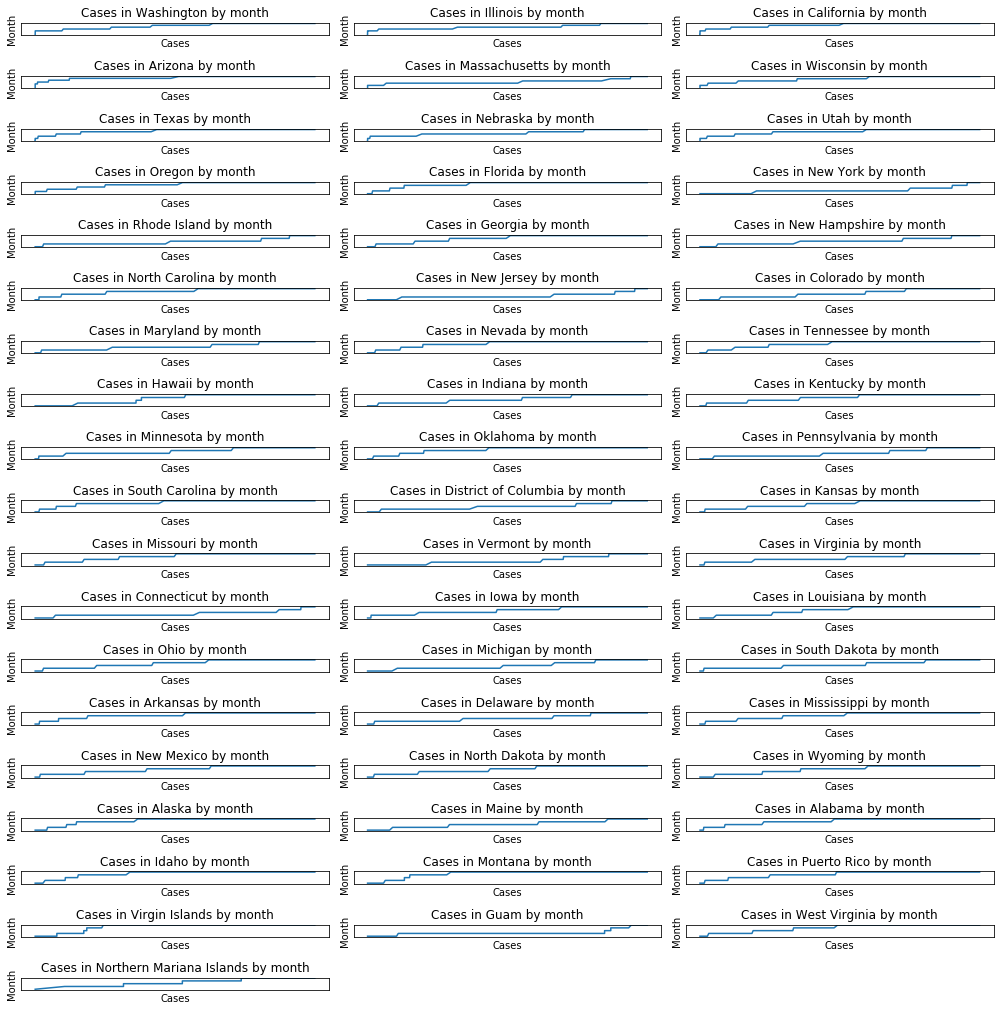

In [10]:
plt.figure(figsize=(14, 14))
# have to make the subplot look nicer
for index, state in enumerate(state_count):
    # create a subplot of cases by month for each state.
    state_data = states_time_series.loc[states_time_series['state'] == state]
    months = state_data['date'].dt.strftime('%B')
    cases = state_data["cases"]
    ax = plt.subplot(19, 3, index + 1)
    plt.setp(ax, xticks=(), yticks=())
    plt.tight_layout()
    plt.plot(cases, months)
    plt.xlabel("Cases")
    plt.ylabel("Month")
    plt.title("Cases in {} by month".format(state))

In [11]:
ohio_data = states_time_series.loc[states_time_series['state'] == "Ohio"]
ohio_data

,date,state,fips,cases,deaths
442,2020-03-09,Ohio,39,3,0
480,2020-03-10,Ohio,39,3,0
524,2020-03-11,Ohio,39,4,0
571,2020-03-12,Ohio,39,5,0
621,2020-03-13,Ohio,39,13,0
...,...,...,...,...,...
7861,2020-07-23,Ohio,39,80186,3256
7916,2020-07-24,Ohio,39,81746,3297
7971,2020-07-25,Ohio,39,83184,3297
8026,2020-07-26,Ohio,39,84073,3307


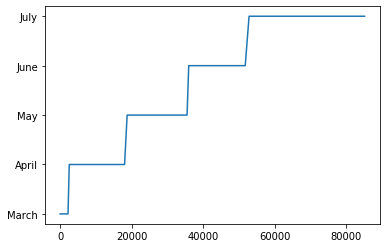

In [12]:
date = pd.to_datetime(ohio_data['date'])
date
dates = date.dt.strftime('%B')
plt.plot(ohio_data['cases'], dates)

In [13]:
iowa_data = states_time_series.loc[states_time_series['state'] == "Iowa"]
iowa_data

,date,state,fips,cases,deaths
393,2020-03-08,Iowa,19,3,0
428,2020-03-09,Iowa,19,8,0
465,2020-03-10,Iowa,19,13,0
506,2020-03-11,Iowa,19,14,0
552,2020-03-12,Iowa,19,16,0
...,...,...,...,...,...
7840,2020-07-23,Iowa,19,40796,820
7895,2020-07-24,Iowa,19,41434,826
7950,2020-07-25,Iowa,19,41886,826
8005,2020-07-26,Iowa,19,42357,829
